<a href="https://colab.research.google.com/github/takakurahashi/github.io/blob/master/%E4%B9%B3%E3%81%8C%E3%82%93%E3%83%87%E3%83%BC%E3%82%BF%E4%B8%BB%E6%88%90%E5%88%86%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# データ加工・処理・分析ライブラリ
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習ライブラリ
import sklearn

# 小数第3位まで表示
%precision 3

'%.3f'

相関係数0.889:


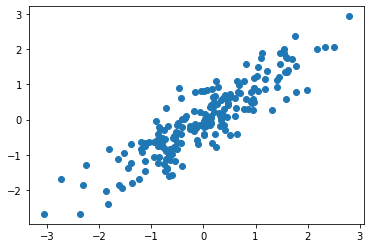

In [2]:
from sklearn.preprocessing import StandardScaler

# RandomStateオブジェクトを作成
sample = np.random.RandomState(1)

#２つの乱数を生成
X = np.dot(sample.rand(2, 2), sample.randn(2, 200)).T

# 標準化
sc = StandardScaler()
X_std = sc.fit_transform(X)

# 相関係数の算出とグラフ化
print('相関係数{:.3f}:'.format(sp.stats.pearsonr(X_std[:, 0], X_std[:, 1])[0]))
plt.scatter(X_std[:, 0], X_std[:, 1])

In [3]:
X_std.shape

(200, 2)

In [4]:
# インポート
from sklearn.decomposition import PCA

# 主成分分析
pca = PCA(n_components=2)
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [5]:
pca.components_.shape

(2, 2)

In [6]:
print(pca.components_)

[[-0.707 -0.707]
 [-0.707  0.707]]


In [7]:
print('各主成分の分散:{}'.format(pca.explained_variance_))

各主成分の分散:[1.899 0.111]


In [8]:
# 標準化された）変数が元来有していた分散
print('X1の分散:', X_std[:, 0].var())
print('X2の分散:', X_std[:, 1].var())

X1の分散: 0.9999999999999997
X2の分散: 0.9999999999999999


In [9]:
print('各主成分の分散割合:{}'.format(pca.explained_variance_ratio_))

各主成分の分散割合:[0.945 0.055]


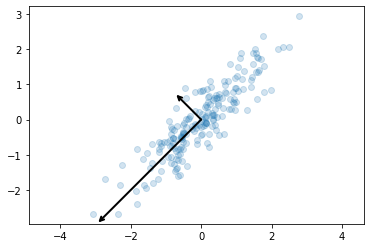

In [10]:
# パラメータ設定
arrowprops=dict(arrowstyle='->',
                linewidth=2,
                shrinkA=0, shrinkB=0)

# 矢印を描くための関数
def draw_vector(v0, v1):
    plt.gca().annotate('', v1, v0, arrowprops=arrowprops)

# 元のデータをプロット
plt.scatter(X_std[:, 0], X_std[:, 1], alpha=0.2)

# 主成分分析の2軸を矢印で表示する
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)

plt.axis('equal');

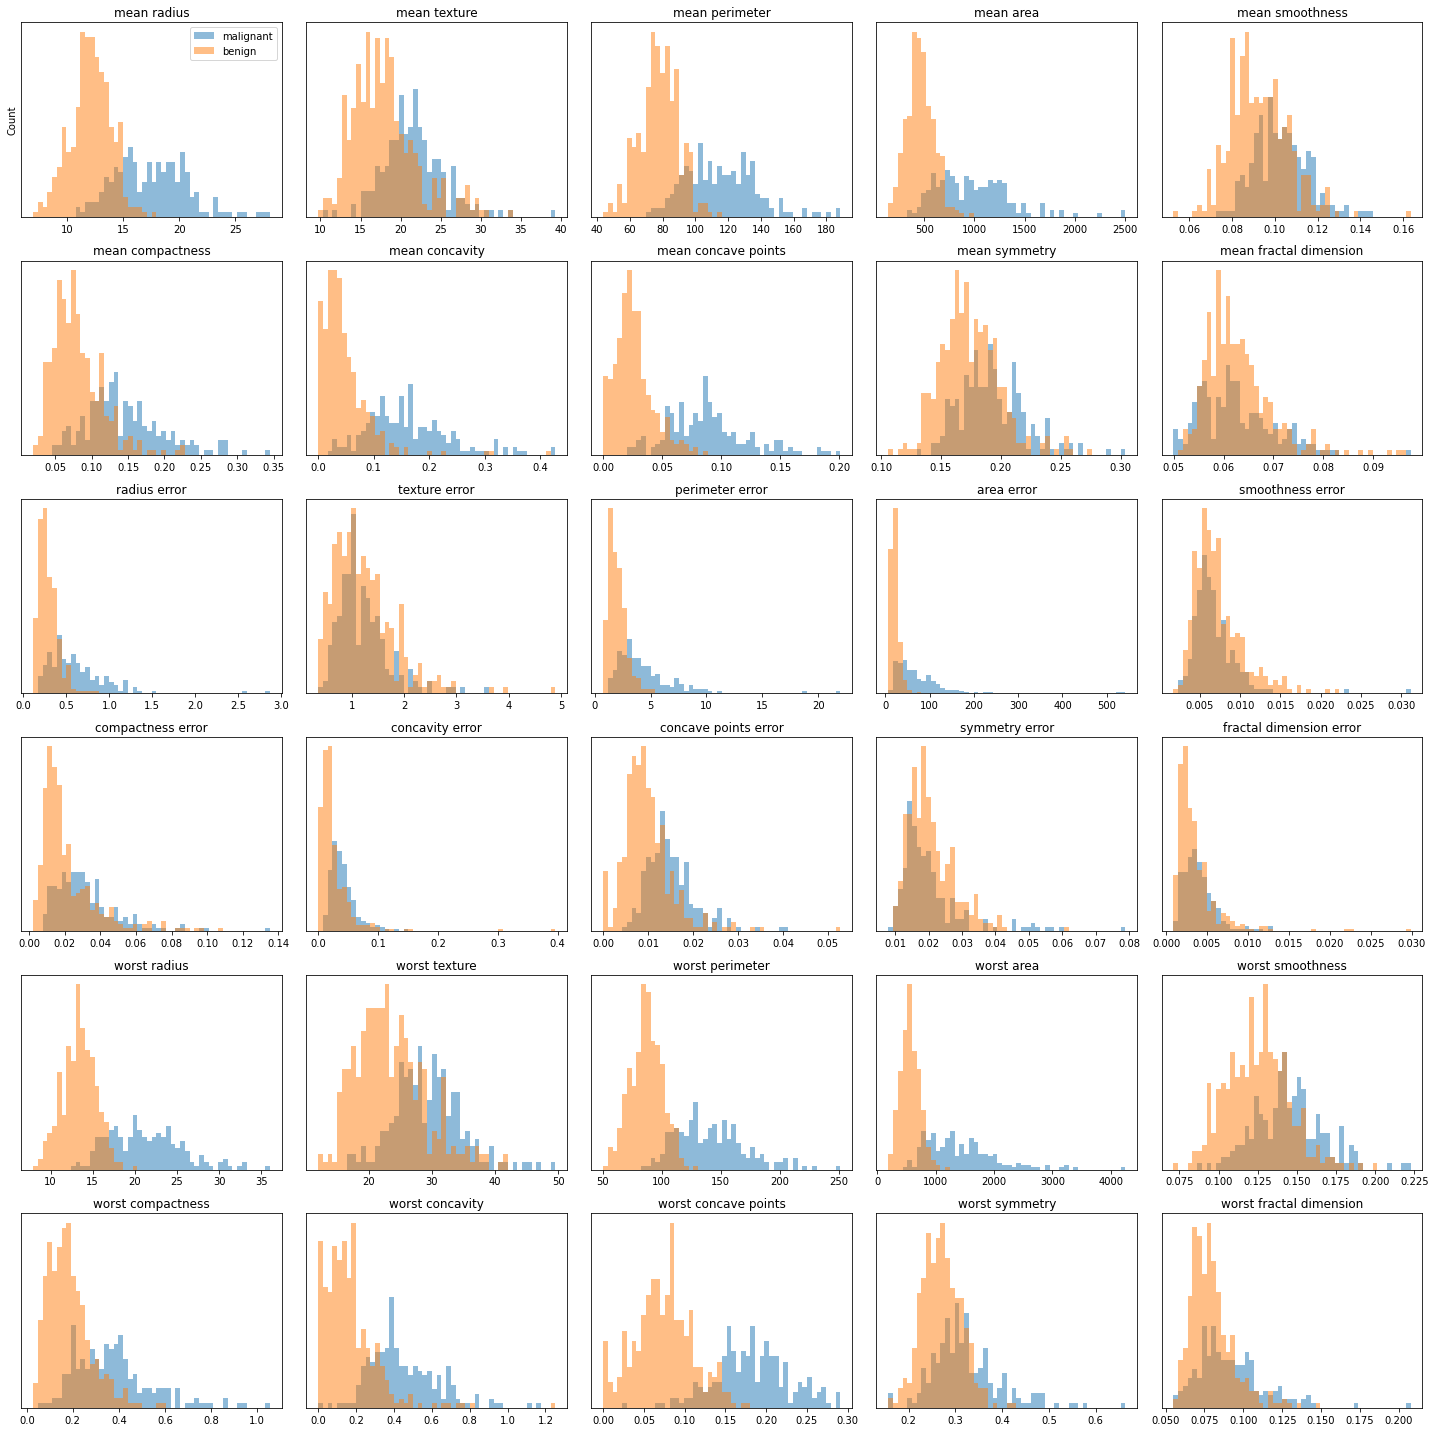

In [11]:
# 乳がんデータを読み込むためのインポート
from sklearn.datasets import load_breast_cancer

# 乳がんデータの取得
cancer = load_breast_cancer()

# データをmalignant（悪性）かbenign（良性）に分けるためのフィルター処理
# malignant（悪性）はcancer.targetが0
malignant = cancer.data[cancer.target==0]

# benign（良性）はcancer.targetが0
benign = cancer.data[cancer.target==1]

#　malignant（悪性）がブルー、benign（良性）がオレンジのヒストグラム
# 各図は、各々の説明変数（mean radiusなど）と目的変数との関係を示したヒストグラム
fig, axes = plt.subplots(6,5,figsize=(20,20))
ax = axes.ravel()
for i in range(30):
    _,bins = np.histogram(cancer.data[:,i], bins=50)
    ax[i].hist(malignant[:,i], bins, alpha=.5)
    ax[i].hist(benign[:,i], bins, alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
# ラベルの設定
ax[0].set_ylabel('Count')
ax[0].legend(['malignant','benign'],loc='best')
fig.tight_layout()

In [12]:
# 標準化
sc = StandardScaler()
X_std = sc.fit_transform(cancer.data)
print(X_std.shape)
print(X_std)
# 主成分分析
pca = PCA(n_components=2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

# 表示
print('X_pca shape:{}'.format(X_pca.shape))
print('Explained variance ratio:{}'.format(pca.explained_variance_ratio_))

(569, 30)
[[ 1.097 -2.073  1.27  ...  2.296  2.751  1.937]
 [ 1.83  -0.354  1.686 ...  1.087 -0.244  0.281]
 [ 1.58   0.456  1.567 ...  1.955  1.152  0.201]
 ...
 [ 0.702  2.046  0.673 ...  0.414 -1.105 -0.318]
 [ 1.838  2.336  1.983 ...  2.29   1.919  2.22 ]
 [-1.808  1.222 -1.814 ... -1.745 -0.048 -0.751]]
X_pca shape:(569, 2)
Explained variance ratio:[0.443 0.19 ]


In [13]:
# 列にラベルをつける、1つ目が第1主成分、2つ目が第2主成分
X_pca = pd.DataFrame(X_pca, columns=['pc1','pc2'])

# 上のデータに、目的変数（cancer.target）を紐づける、横に結合
X_pca = pd.concat([X_pca, pd.DataFrame(cancer.target, columns=['target'])], axis=1)
X_pca

,pc1,pc2,target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0
...,...,...,...
564,6.439315,-3.576817,0
565,3.793382,-3.584048,0
566,1.256179,-1.902297,0
567,10.374794,1.672010,0


In [16]:
# 悪性、良性を分ける
pca_malignant = X_pca[X_pca['target']==0]
pca_benign = X_pca[X_pca['target']==1]

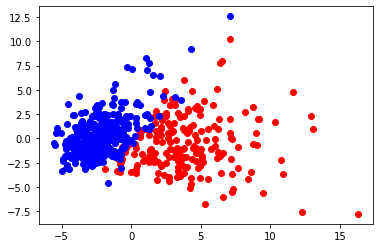

In [15]:
plt.scatter(pca_malignant['pc1'],pca_malignant['pc2'],color='red')
plt.scatter(pca_benign['pc1'],pca_benign['pc2'],color='blue')

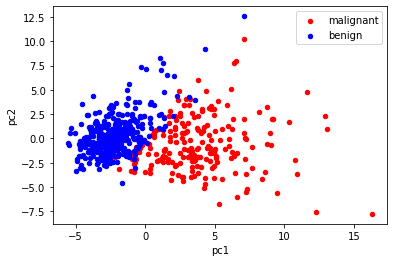

In [17]:
# 悪性をプロット
ax = pca_malignant.plot.scatter(x='pc1', y='pc2', color='red', label='malignant');

# 良性をプロット
pca_benign.plot.scatter(x='pc1', y='pc2', color='blue', label='benign', ax=ax);